In [11]:
import pandas as pd
from PerformanceAnalyzer import * 
from Performance import * 

In [12]:
from CSVExport import * 

In [13]:
#df1 = pd.read_csv("BinaryResults191.csv")
df1 = pd.read_csv("Binaryclassificationdata.csv")

In [14]:
df1.true_disorder.value_counts()/len(df1)

true_disorder
CONTROL            0.546179
ADHD               0.201014
DEPRESSION         0.056139
AUTISM             0.053604
BIPOLAR            0.043463
PTSD               0.039478
ANXIETY            0.022456
OCD                0.021369
EATING DISORDER    0.008330
SCHIZOPHRENIA      0.007968
Name: count, dtype: float64

In [15]:
df1["GPT35FineTunedTopP1"] = df1["GPT35FineTunedTopP1"].apply(lambda x: x.lower() if isinstance(x, str) else x)
df1["GPT35TurboBaseTopP1"] = df1["GPT35TurboBaseTopP1"].apply(lambda x: x.lower() if isinstance(x, str) else x)
df1["GPT35TurboBaseTemp0"] = df1["GPT35TurboBaseTemp0"].apply(lambda x: x.lower() if isinstance(x, str) else x)
df1

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,_id,sampled_tweets,ground_truth,true_disorder,GPT35FineTunedTemp0,GPT35TurboBaseTemp0,GPT35FineTunedTopP1,GPT35TurboBaseTopP1,Turbo3.5Base_151,extracted_tweets
0,0,0,0,1.423036e+09,"""@USER An absolute legend for this thank you!""...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,"@USER An absolute legend for this thank you!"";..."
1,1,1,1,7.686502e+17,"""@USER PLEASE"";""@USER and I are gonna get matc...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,"@USER PLEASE"";""@USER and I are gonna get match..."
2,2,2,2,1.160497e+18,"""@USER Thank you ️"";""@USER Youre so sweet and ...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,"@USER Thank you ️"";""@USER Youre so sweet and I..."
3,3,3,3,1.468382e+18,"""woke up from a dream about one of my middle s...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,woke up from a dream about one of my middle sc...
4,4,4,4,9.996736e+17,"""By fascists they mean anyone who doesn't agre...",psychological disorder,PTSD,no psychological disorder,psychological disorder,no psychological disorder,psychological disorder,psychological disorder,By fascists they mean anyone who doesn't agree...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2756,2756,3085,3085,1.953050e+09,"""@USER Woody is not in it but JK Simmons and S...",no psychological disorder,CONTROL,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,@USER Woody is not in it but JK Simmons and Si...
2757,2757,3086,3086,1.961695e+09,"""@USER Lori reminds me of this article ""Spanis...",no psychological disorder,CONTROL,no psychological disorder,no psychological disorder,no psychological disorder,no psychological disorder,No psychological disorder,"@USER Lori reminds me of this article ""Spanish..."
2758,2758,3087,3087,2.151130e+09,"""@USER Real funny Big Jim !!!! HTTPURL"";""@USER...",no psychological disorder,CONTROL,psychological disorder,psychological disorder,psychological disorder,psychological disorder,No psychological disorder,"@USER Real funny Big Jim !!!! HTTPURL"";""@USER ..."
2759,2759,3088,3088,2.153638e+09,"""can't get the song out of my head😍😍😍 HTTPURL""...",no psychological disorder,CONTROL,no psychological disorder,no psychological disorder,no psychological disorder,no psychological disorder,No psychological disorder,"can't get the song out of my head😍😍😍 HTTPURL"";..."


In [16]:


df1.rename(columns={'GPT35FineTunedTemp0': 'GPT35Finetuned_Binary'}, inplace=True)
df1.rename(columns={'GPT35TurboBaseTemp0': 'GPT35TurboBaseTemp0_Binary'}, inplace=True)
df1.rename(columns={'GPT35TurboBaseTopP1': 'GPT35TurboBaseTopP1_Binary'}, inplace=True)



In [17]:
df1["binary_disorder"] = df1["ground_truth"]

In [18]:
df1 = pd.read_csv("FinalBinaryData191.csv")

In [19]:
performance_35_top1 = calculate_performance_binary(df1,"GPT35TurboBaseTopP1_Binary")[['Precision', 'Recall', 'F1']].mean()

no psychological disorder
Precision  0.6483870967741936
Recall: 0.23633156966490299
F1 0.3464024127531236
TPR 0.23633156966490299
FPR 0.15694744420446363
AUC 0.600925961799233
psychological disorder
Precision  0.4746655857316579
Recall: 0.8430525557955364
F1 0.6073651452282157
TPR 0.8430525557955364
FPR 0.7619047619047619
AUC 0.52528035885934


In [20]:
performance_35_temp0 = calculate_performance_binary(df1,"GPT35TurboBaseTemp0_Binary")[['Precision', 'Recall', 'F1']].mean()

no psychological disorder
Precision  0.6515837104072398
Recall: 0.25396825396825395
F1 0.36548223350253806
TPR 0.25396825396825395
FPR 0.16630669546436286
AUC 0.6042907251814993
psychological disorder
Precision  0.47713226205191595
Recall: 0.8336933045356372
F1 0.6069182389937107
TPR 0.8336933045356372
FPR 0.746031746031746
AUC 0.527745827817444


In [21]:
performance_35_top1

Precision    0.561526
Recall       0.539692
F1           0.476884
dtype: float64

In [22]:
performance_35_temp0

Precision    0.564358
Recall       0.543831
F1           0.486200
dtype: float64

In [23]:
import matplotlib.pyplot as plt

Plot for the difference between temperature and top_p = 1 setting:

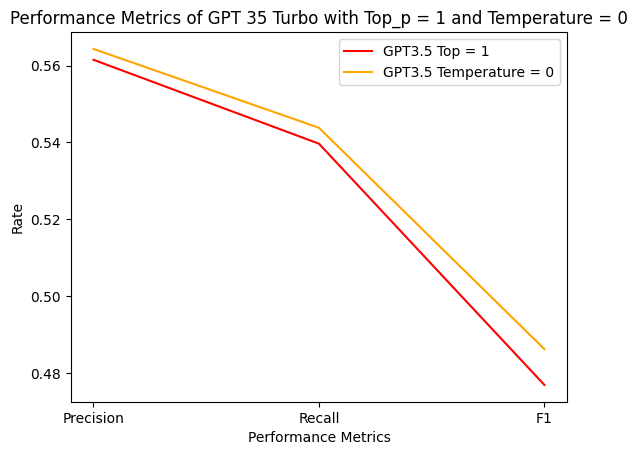

In [24]:
plt.plot(performance_35_top1, label='GPT3.5 Top = 1', color = "red")
plt.plot(performance_35_temp0, label='GPT3.5 Temperature = 0', color = "orange")

# Adding labels and title
plt.xlabel('Performance Metrics')
plt.ylabel('Rate')
plt.title('Performance Metrics of GPT 35 Turbo with Top_p = 1 and Temperature = 0')

# Adding legend
plt.legend()
plt.savefig('tempvstop.png', dpi=300)

# Show the plot
plt.show()


In [25]:
def calculate_accuracy(df, disorder, classifier):
    mask = (df['binary_disorder'] == disorder) & (df[classifier] == disorder)
    tp = mask.sum()
    acc = tp/(df.ground_truth == disorder).sum()
    return acc
    

In [26]:
df1

,Unnamed: 0.1,Unnamed: 0,_id,sampled_tweets,ground_truth,true_disorder,GPT35Finetuned_Binary,GPT35TurboBaseTemp0_Binary,GPT35FineTunedTopP1,GPT35TurboBaseTopP1_Binary,Turbo3.5Base_151,binary_disorder
0,0,0,1.423036e+09,"""@USER An absolute legend for this thank you!""...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
1,1,1,7.686502e+17,"""@USER PLEASE"";""@USER and I are gonna get matc...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
2,2,2,1.160497e+18,"""@USER Thank you ️"";""@USER Youre so sweet and ...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
3,3,3,1.468382e+18,"""woke up from a dream about one of my middle s...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
4,4,4,9.996736e+17,"""By fascists they mean anyone who doesn't agre...",psychological disorder,PTSD,no psychological disorder,psychological disorder,no psychological disorder,psychological disorder,psychological disorder,psychological disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
3085,3085,3085,1.953050e+09,"""@USER Woody is not in it but JK Simmons and S...",no psychological disorder,CONTROL,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,no psychological disorder
3086,3086,3086,1.961695e+09,"""@USER Lori reminds me of this article ""Spanis...",no psychological disorder,CONTROL,no psychological disorder,no psychological disorder,no psychological disorder,no psychological disorder,No psychological disorder,no psychological disorder
3087,3087,3087,2.151130e+09,"""@USER Real funny Big Jim !!!! HTTPURL"";""@USER...",no psychological disorder,CONTROL,psychological disorder,psychological disorder,psychological disorder,psychological disorder,No psychological disorder,no psychological disorder
3088,3088,3088,2.153638e+09,"""can't get the song out of my head😍😍😍 HTTPURL""...",no psychological disorder,CONTROL,no psychological disorder,no psychological disorder,no psychological disorder,no psychological disorder,No psychological disorder,no psychological disorder


Calculate the accuracies for the temp0 and top_p1 results for binary classification:

In [27]:
import pandas as pd
data = {'psychological disorder': [calculate_accuracy(df1, "psychological disorder", "GPT35TurboBaseTemp0_Binary"), calculate_accuracy(df1, "psychological disorder", "GPT35TurboBaseTopP1_Binary") ],
        'no psychological disorder': [calculate_accuracy(df1, "no psychological disorder", "GPT35TurboBaseTemp0_Binary"), calculate_accuracy(df1, "no psychological disorder", "GPT35TurboBaseTopP1_Binary")]}

df = pd.DataFrame(data, index=['GPT3.5Temp0', 'GPT3.5TopP1'])

df

,psychological disorder,no psychological disorder
GPT3.5Temp0,0.833693,0.253968
GPT3.5TopP1,0.843053,0.236332


In [28]:
df1

,Unnamed: 0.1,Unnamed: 0,_id,sampled_tweets,ground_truth,true_disorder,GPT35Finetuned_Binary,GPT35TurboBaseTemp0_Binary,GPT35FineTunedTopP1,GPT35TurboBaseTopP1_Binary,Turbo3.5Base_151,binary_disorder
0,0,0,1.423036e+09,"""@USER An absolute legend for this thank you!""...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
1,1,1,7.686502e+17,"""@USER PLEASE"";""@USER and I are gonna get matc...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
2,2,2,1.160497e+18,"""@USER Thank you ️"";""@USER Youre so sweet and ...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
3,3,3,1.468382e+18,"""woke up from a dream about one of my middle s...",psychological disorder,PTSD,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder
4,4,4,9.996736e+17,"""By fascists they mean anyone who doesn't agre...",psychological disorder,PTSD,no psychological disorder,psychological disorder,no psychological disorder,psychological disorder,psychological disorder,psychological disorder
...,...,...,...,...,...,...,...,...,...,...,...,...
3085,3085,3085,1.953050e+09,"""@USER Woody is not in it but JK Simmons and S...",no psychological disorder,CONTROL,psychological disorder,psychological disorder,psychological disorder,psychological disorder,psychological disorder,no psychological disorder
3086,3086,3086,1.961695e+09,"""@USER Lori reminds me of this article ""Spanis...",no psychological disorder,CONTROL,no psychological disorder,no psychological disorder,no psychological disorder,no psychological disorder,No psychological disorder,no psychological disorder
3087,3087,3087,2.151130e+09,"""@USER Real funny Big Jim !!!! HTTPURL"";""@USER...",no psychological disorder,CONTROL,psychological disorder,psychological disorder,psychological disorder,psychological disorder,No psychological disorder,no psychological disorder
3088,3088,3088,2.153638e+09,"""can't get the song out of my head😍😍😍 HTTPURL""...",no psychological disorder,CONTROL,no psychological disorder,no psychological disorder,no psychological disorder,no psychological disorder,No psychological disorder,no psychological disorder


In [29]:
base_top = calculate_performance_binary(df1, "GPT35TurboBaseTopP1_Binary" )[['Precision', 'Recall', 'F1']].mean().to_frame()
base_top = base_top.sort_index()
base_top = base_top[0]

no psychological disorder
Precision  0.6483870967741936
Recall: 0.23633156966490299
F1 0.3464024127531236
TPR 0.23633156966490299
FPR 0.15694744420446363
AUC 0.600925961799233
psychological disorder
Precision  0.4746655857316579
Recall: 0.8430525557955364
F1 0.6073651452282157
TPR 0.8430525557955364
FPR 0.7619047619047619
AUC 0.52528035885934


In [30]:
ft_top =calculate_performance_binary(df1, "GPT35FineTunedTopP1" )[['Precision', 'Recall', 'F1']].mean().to_frame()
ft_top = ft_top.sort_index()
ft_top = ft_top[0]

no psychological disorder
Precision  0.762472885032538
Recall: 0.4132863021751911
F1 0.5360274494853221
TPR 0.4132863021751911
FPR 0.15766738660907129
AUC 0.7238525826064911
psychological disorder
Precision  0.5394554683894786
Recall: 0.8416126709863211
F1 0.6574803149606299
TPR 0.8416126709863211
FPR 0.586713697824809
AUC 0.5892299472751727


In [31]:
base = pd.read_csv("MexicanResearchDataBinary.csv", sep = ";").loc[5].to_frame()
base.columns = base.iloc[0]
base = base.drop(base.index[0])
base = base.drop(base.index[0])
base = base["Char 5gram(C5)"].astype(float)
base

F1           0.819
Precision    0.867
Recall       0.795
Name: Char 5gram(C5), dtype: float64

In [32]:
ft_top

F1           0.596754
Precision    0.650964
Recall       0.627449
Name: 0, dtype: float64

In [33]:
base

F1           0.819
Precision    0.867
Recall       0.795
Name: Char 5gram(C5), dtype: float64

In [34]:
base_top

F1           0.476884
Precision    0.561526
Recall       0.539692
Name: 0, dtype: float64

In [35]:
performance_binary = pd.DataFrame({
    'Unigram(U)': base, 
    'GPT35_FineTunedTopP1': ft_top,
    'GPT35_Base_TopP1': base_top
})
performance_binary.T[["Precision", "Recall", "F1"]]

,Precision,Recall,F1
Unigram(U),0.867000,0.795000,0.819000
GPT35_FineTunedTopP1,0.650964,0.627449,0.596754
GPT35_Base_TopP1,0.561526,0.539692,0.476884


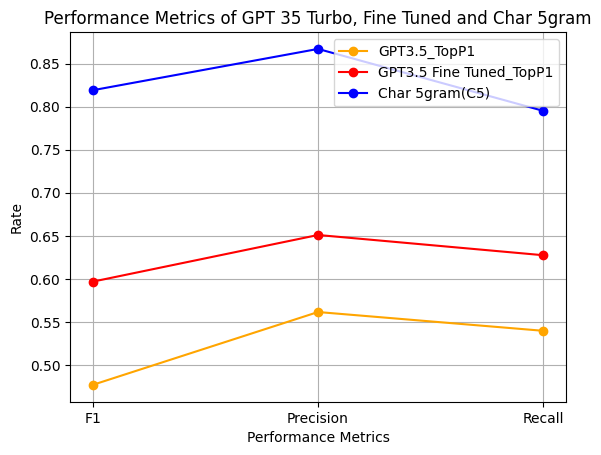

In [36]:
plt.plot(base_top, label='GPT3.5_TopP1', color = "orange", marker='o')
plt.plot(ft_top, label='GPT3.5 Fine Tuned_TopP1', color = "red", marker='o')
plt.plot(base, label='Char 5gram(C5)', color = "blue", marker='o')

# Adding labels and title
plt.xlabel('Performance Metrics')
plt.ylabel('Rate')
plt.title('Performance Metrics of GPT 35 Turbo, Fine Tuned and Char 5gram')

plt.grid(True) 

# Adding legend
plt.legend()
plt.savefig('binarycomparison.png', dpi=300)

# Show the plot
plt.show()
